Assignment 6: Tugas Python 2

Nama: Ihsan Ahmad Kamal

NIM : 1102201674

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("drive/My Drive/dataset/data0.csv")
df.head()

,953,915,989,957,942,945,964,967,951,958,...,999.2,1008,999.3,1024,931,831,962.5,919,1211,952.1
0,951,927,984,961,943,948,965,974,952,960,...,1002,1002,1011,1030,935,830,965,914,1204,950
1,949,934,981,961,943,945,966,971,954,962,...,1006,999,1016,1033,937,832,965,913,1175,947
2,948,936,981,960,944,943,964,973,955,961,...,1009,999,1012,1033,937,827,967,913,1134,947
3,950,935,983,960,948,944,960,970,953,960,...,1009,999,1008,1032,934,825,966,916,1084,949
4,950,938,987,961,954,946,963,965,951,958,...,1007,999,1010,1032,931,822,965,917,1039,949


Perhitungan setiap kolomnya

In [5]:
statistics = pd.DataFrame({
    'mean': df.mean(),
    'std': df.std(),
    'skewness': df.skew(),
    'median': df.median(),
    'energy': (df**2).mean(),
    'min': df.min(),
    'max': df.max()
})

df_statistics = df.copy()
for column in df.columns:
    df_statistics[column] = statistics.loc[column]

df_statistics.to_csv('data0-statistics.csv', index=False)

print(statistics)


Statistik Setiap Kolom:
             mean        std  skewness  median         energy  min   max
953    968.532370  38.087937  4.540302   964.0  939505.239789  906  1260
915    960.045568  35.910211  4.660723   956.0  922976.677966  901  1235
989    967.593220  39.111912  4.216797   962.0  937765.956655  901  1248
957    962.974437  39.208241  4.389730   958.0  928856.626007  904  1243
942    970.038622  38.269399  4.596763   964.0  942439.067797  908  1286
...           ...        ...       ...     ...            ...  ...   ...
831    973.982495  72.590952  1.189443   965.0  953909.883023  708  1390
962.5  976.744929  65.501847  1.692218   966.0  958319.956377  743  1336
919    992.431231  45.911529  1.389198   984.0  987027.030842  830  1219
1211   991.007224  91.239771  2.184692   985.0  990417.701306  760  1513
952.1  977.994721  94.754220  2.465102   962.0  965449.541261  798  1481

[160 rows x 7 columns]


Plot sinyal dengan multiplot 2x3, sinyal yang diplot dapat dipilih dari 6 kolom secara bebas

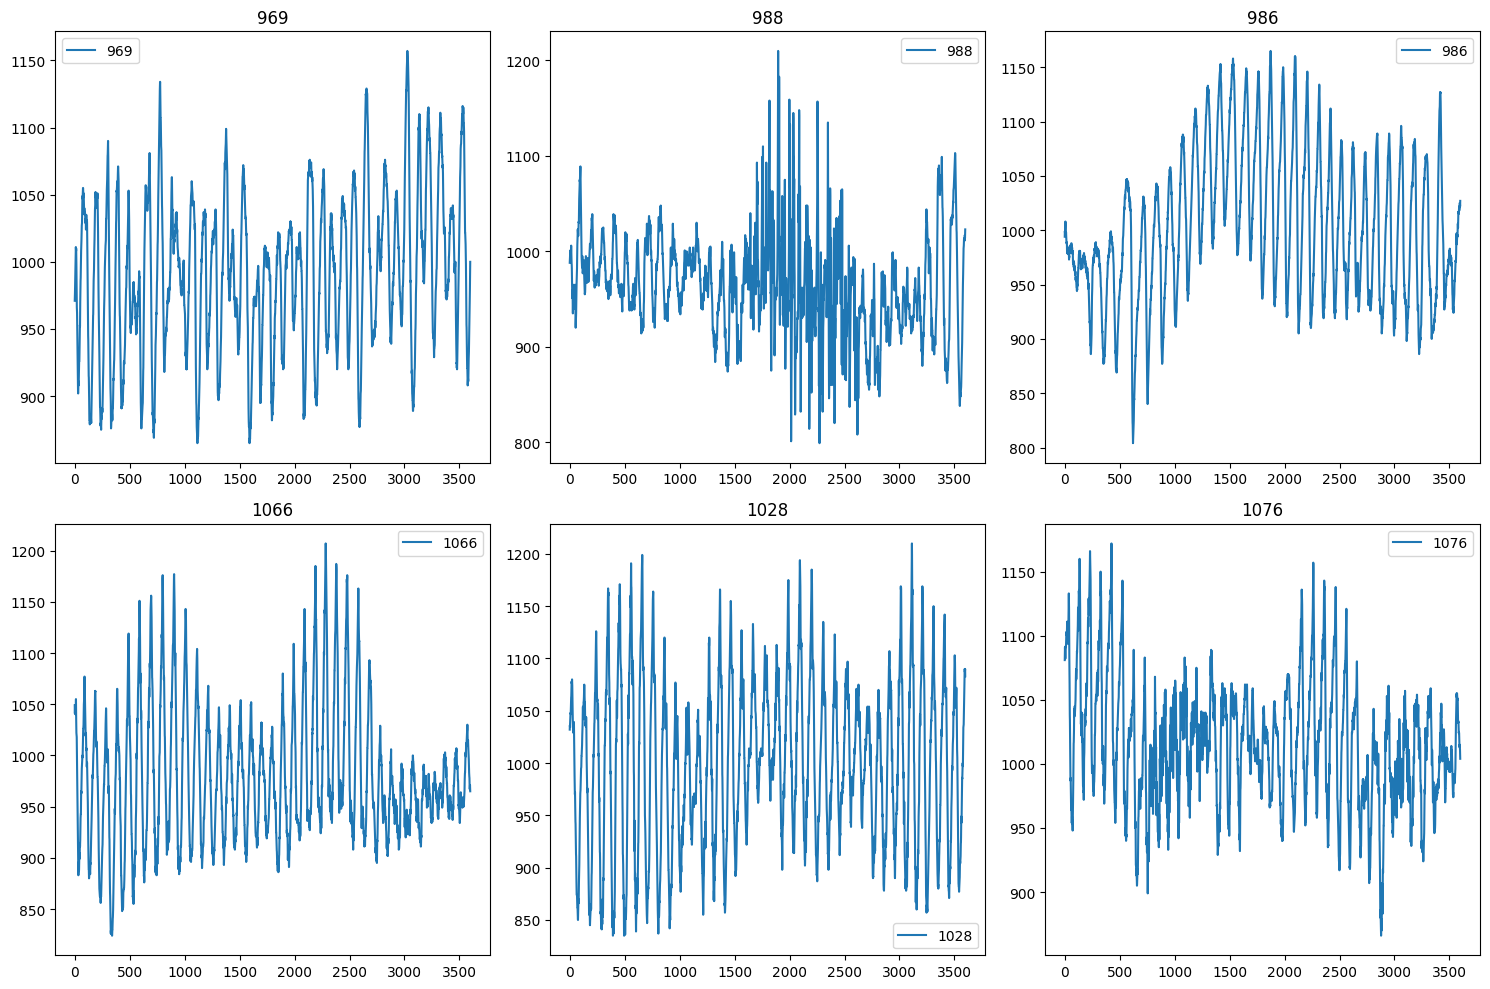

In [27]:
import matplotlib.pyplot as plt

selected_columns = df.columns[30:36]


fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, column in enumerate(selected_columns):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index, col_index]
    ax.plot(df[column], label=column)
    ax.set_title(column)
    ax.legend()

plt.tight_layout()
plt.show()

Plot scatterplot dari hasil perhitungan kolom untuk rata-rata, buat warna dan tanda yang berbeda untuk setiap 10 kolom, kolom 1-10 warna merah *, kolom 11-20 warna biru o, kolom 21-30 warna hijau v, dst (bebas). Dimana x adalah nilai rata-rata dan y adalah nilai standar deviasi.

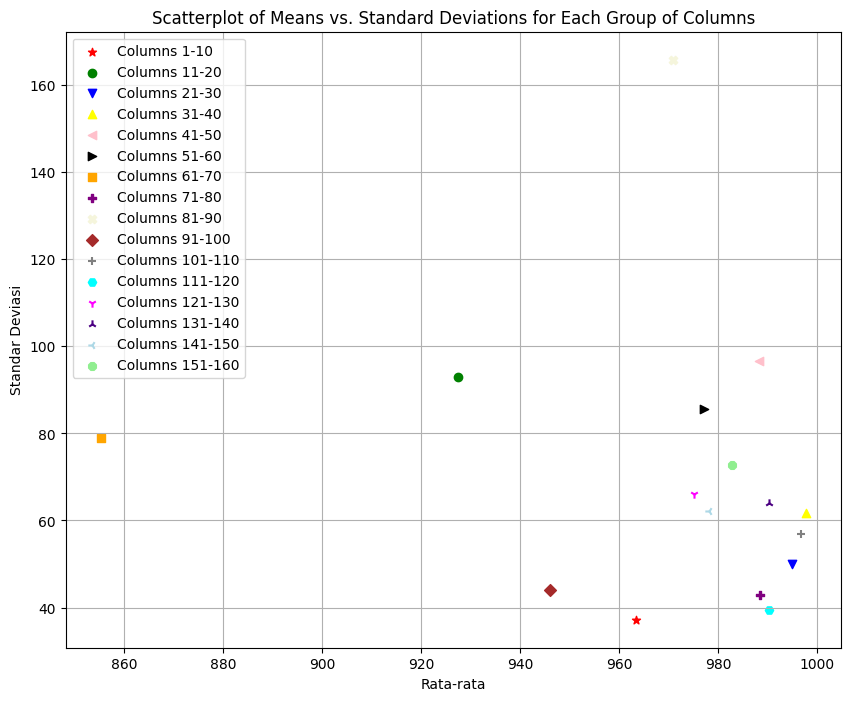

In [22]:
groups = [df.columns[i:i+10] for i in range(0, len(df.columns), 10)]

fig, ax = plt.subplots(figsize=(10, 8))

colors = ["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta", "indigo", "lightblue", "lightgreen"]
markers = ['*', 'o', 'v', '^', '<', '>', 's', 'P', 'X', 'D', '+', 'H', '1', '2', '3', '8' ]

for i, group in enumerate(groups):
    means = df[group].mean().mean()
    stds = df[group].std().mean()

    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    ax.scatter(means, stds, color=color, marker=marker, label=f'Columns {i*10+1}-{i*10+10}')


ax.set_xlabel('Rata-rata')
ax.set_ylabel('Standar Deviasi')
ax.legend()


plt.title('Scatterplot of Means vs. Standard Deviations for Each Group of Columns')
plt.grid(True)
plt.show()


Plot scatterplot dari hasil perhitungan kolom untuk rata-rata, buat warna dan tanda yang berbeda untuk setiap 10 kolom, kolom 1-10 warna merah *, kolom 11-20 warna biru o, kolom 21-30 warna hijau v, dst (bebas). Dimana x adalah nilai skewness dan y adalah median.

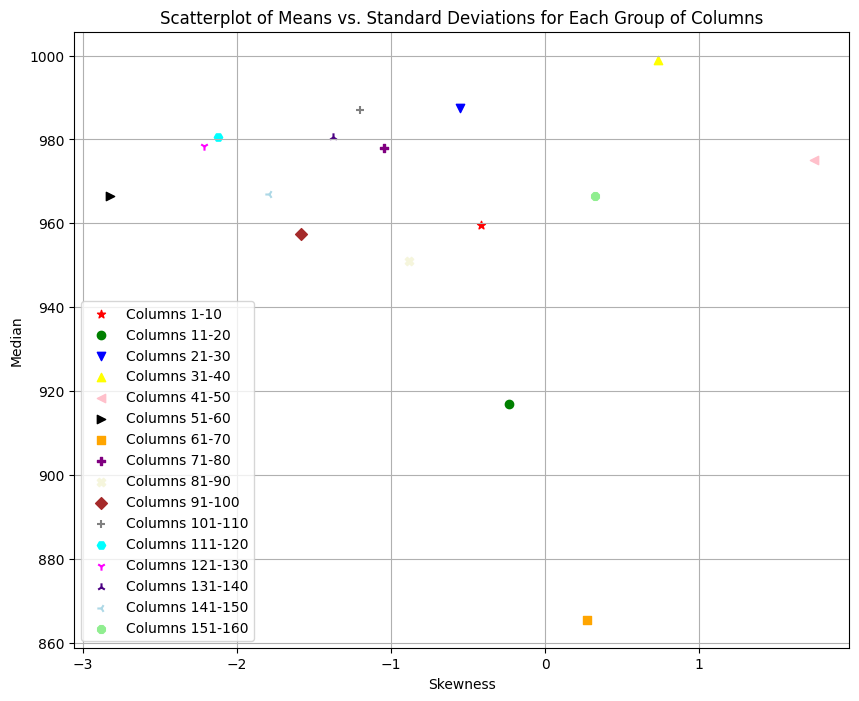

In [26]:
groups = [df.columns[i:i+10] for i in range(0, len(df.columns), 10)]

fig, ax = plt.subplots(figsize=(10, 8))

colors = ["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta", "indigo", "lightblue", "lightgreen"]
markers = ['*', 'o', 'v', '^', '<', '>', 's', 'P', 'X', 'D', '+', 'H', '1', '2', '3', '8' ]

for i, group in enumerate(groups):
    skewness = df[group].skew().skew()
    medians = df[group].median().median()

    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    ax.scatter(skewness, medians, color=color, marker=marker, label=f'Columns {i*10+1}-{i*10+10}')


ax.set_xlabel('Skewness')
ax.set_ylabel('Median')
ax.legend()


plt.title('Scatterplot of Means vs. Standard Deviations for Each Group of Columns')
plt.grid(True)
plt.show()
